# 線形代数：ランク (2.6.2 Rank)

このノートブックでは、**ランク（rank）**について基礎から学びます。

**「データの中に、実質的にどれだけの情報量があるか」**を知る指標です。

## 目次
1. [ランクとは](#ランクとは)
2. [ランクの重要性](#ランクの重要性)
3. [ランクの計算方法](#ランクの計算方法)
4. [線形独立性との関係](#線形独立性との関係)
5. [連立方程式との関係](#連立方程式との関係)
6. [逆行列との関係](#逆行列との関係)
7. [ランクの可視化](#ランクの可視化)
8. [実装例](#実装例)
9. [機械学習での応用例](#機械学習での応用例)


---

## 必要なライブラリのインポート


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Polygon
import seaborn as sns
import matplotlib.font_manager as fm
from mpl_toolkits.mplot3d import Axes3D

# 日本語フォントの設定
try:
    jp_fonts = ['Hiragino Sans', 'Hiragino Kaku Gothic ProN', 'Yu Gothic',
                'Noto Sans CJK JP', 'AppleGothic', 'Arial Unicode MS']
    available_fonts = [f.name for f in fm.fontManager.ttflist]

    font_found = False
    for font_name in jp_fonts:
        if font_name in available_fonts:
            plt.rcParams['font.family'] = font_name
            font_found = True
            print(f"Using font: {font_name}")
            break

    if not font_found:
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'Hiragino Kaku Gothic ProN',
                                            'Yu Gothic', 'Meiryo', 'MS Gothic', 'DejaVu Sans']
        print("Using fallback font configuration")
except Exception as e:
    print(f"Font configuration warning: {e}")
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.12/site-

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.12/site-

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



Using font: Hiragino Sans


---

## ランクとは

**ランク（rank）**は、行列の**線形独立な行（または列）の最大数**です。

### 数学的な定義

行列 $A \in \mathbb{R}^{m \times n}$ のランクは、以下のように定義されます：

$$\text{rank}(A) = \dim(\text{span}(\{\mathbf{a}_1, \mathbf{a}_2, \ldots, \mathbf{a}_n\}))$$

ここで、$\mathbf{a}_i$ は $A$ の列ベクトルです。

### 重要な性質

1. **行ランク = 列ランク**: 行列の行ランクと列ランクは常に等しい
2. **ランクの上限**: $\text{rank}(A) \leq \min(m, n)$
3. **フルランク**: $\text{rank}(A) = \min(m, n)$ のとき、$A$ は**フルランク（full rank）**

### 直感的な理解

- **ランク = 実質的な次元数**: データが実際に張る空間の次元数
- **ランク < 次元数**: データに重複（線形従属）がある
- **ランク = 次元数**: データが線形独立で、情報が最大限活用されている


---

## ランクの重要性

### なぜランクが重要なのか？

1. **情報量の測定**: 巨大なデータ行列があっても、中身が重複だらけ（線形従属）では意味がありません
2. **連立方程式の解の判定**: 連立方程式が解けるかどうか（逆行列が存在するか）を判断できます
3. **データの本質的な次元**: データが実際に張る空間の次元を知ることができます
4. **計算効率**: ランクが低い場合、より少ない次元でデータを表現できます

### 具体例

- **画像データ**: 1000×1000ピクセルの画像でも、実際の情報量はランクで決まる
- **特徴量**: 100個の特徴量があっても、ランクが10なら実質的には10次元の情報
- **機械学習**: ランクが低いと過学習のリスクが高まる


---

## ランクの計算方法

NumPyでは `np.linalg.matrix_rank()` を使ってランクを計算できます。

内部的には、**特異値分解（SVD）**や**行基本変形**を使って計算されます。


In [2]:
# 例1: フルランク行列（3×3）
A_full = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

rank_A = np.linalg.matrix_rank(A_full)
print(f"行列 A:\n{A_full}")
print(f"\nランク: {rank_A}")
print(f"行列のサイズ: {A_full.shape}")
print(f"最大ランク: {min(A_full.shape)}")


行列 A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

ランク: 2
行列のサイズ: (3, 3)
最大ランク: 3


In [3]:
# 例2: ランク不足行列（線形従属な行がある）
A_low = np.array([[1, 2, 3],
                  [2, 4, 6],  # 1行目の2倍
                  [3, 6, 9]])  # 1行目の3倍

rank_A_low = np.linalg.matrix_rank(A_low)
print(f"行列 A:\n{A_low}")
print(f"\nランク: {rank_A_low}")
print(f"行列のサイズ: {A_low.shape}")
print(f"最大ランク: {min(A_low.shape)}")
print(f"\n注意: ランクが {min(A_low.shape)} より小さい = 線形従属な行/列が存在")


行列 A:
[[1 2 3]
 [2 4 6]
 [3 6 9]]

ランク: 1
行列のサイズ: (3, 3)
最大ランク: 3

注意: ランクが 3 より小さい = 線形従属な行/列が存在


In [4]:
# 例3: 異なるサイズの行列
examples = [
    ("2×3行列（フルランク）", np.array([[1, 2, 3], [4, 5, 6]])),
    ("2×3行列（ランク1）", np.array([[1, 2, 3], [2, 4, 6]])),
    ("3×2行列（フルランク）", np.array([[1, 2], [3, 4], [5, 6]])),
    ("4×4単位行列", np.eye(4)),
    ("4×4零行列", np.zeros((4, 4))),
]

for name, matrix in examples:
    rank = np.linalg.matrix_rank(matrix)
    max_rank = min(matrix.shape)
    print(f"{name}:")
    print(f"  サイズ: {matrix.shape}, ランク: {rank}, 最大ランク: {max_rank}")
    if rank == max_rank:
        print(f"  → フルランク")
    else:
        print(f"  → ランク不足（ランク欠損: {max_rank - rank}）")
    print()


2×3行列（フルランク）:
  サイズ: (2, 3), ランク: 2, 最大ランク: 2
  → フルランク

2×3行列（ランク1）:
  サイズ: (2, 3), ランク: 1, 最大ランク: 2
  → ランク不足（ランク欠損: 1）

3×2行列（フルランク）:
  サイズ: (3, 2), ランク: 2, 最大ランク: 2
  → フルランク

4×4単位行列:
  サイズ: (4, 4), ランク: 4, 最大ランク: 4
  → フルランク

4×4零行列:
  サイズ: (4, 4), ランク: 0, 最大ランク: 4
  → ランク不足（ランク欠損: 4）



---

## 線形独立性との関係

ランクは、行列の列（または行）ベクトルがどれだけ線形独立かを示します。

### 関係性

- **ランク = 列数**: すべての列が線形独立
- **ランク < 列数**: 一部の列が他の列の線形結合で表せる（線形従属）
- **ランク = 0**: すべての列が零ベクトル


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/2004240981.py:36: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/2004240981.py:36: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/2004240981.py:36: UserWarning: Glyph 29420 (\N{CJK UNIFIED IDEOGRAPH-72EC}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/2004240981.py:36: UserWarning: Glyph 31435 (\N{CJK UNIFIED IDEOGRAPH-7ACB}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/2004240981.py:36: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel

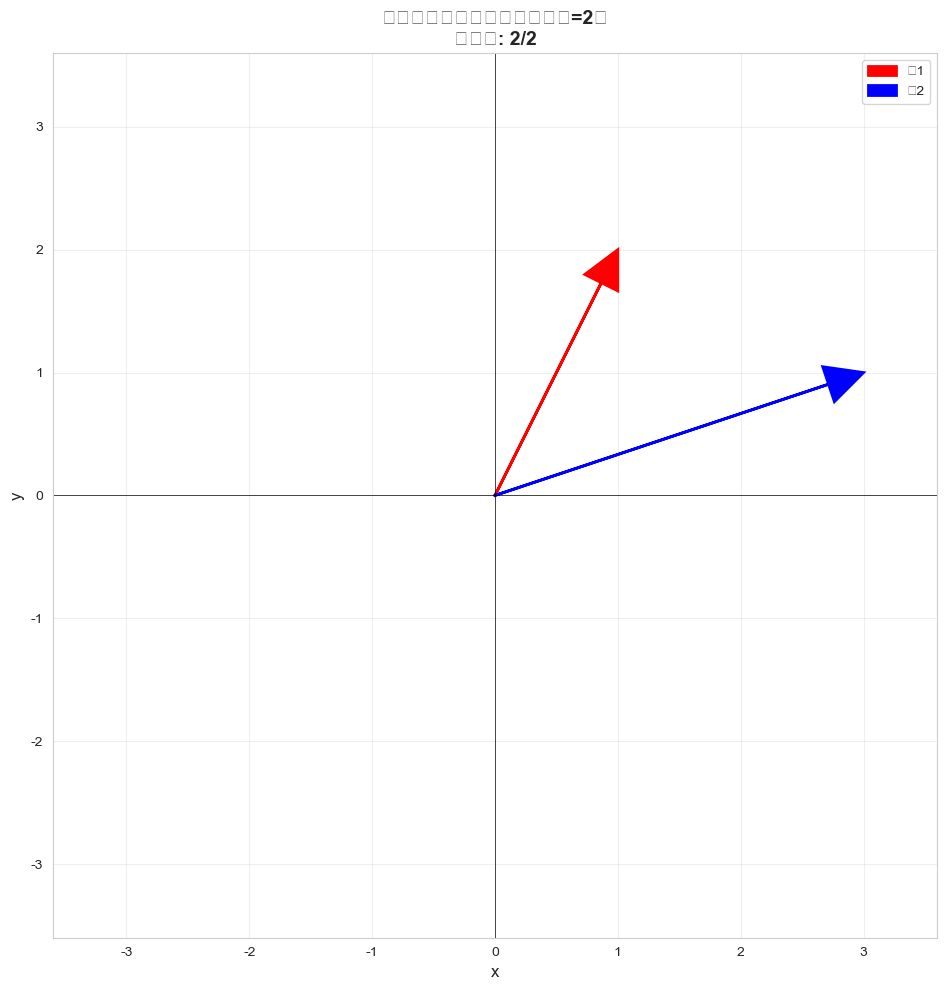

/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/2004240981.py:36: UserWarning: Glyph 24467 (\N{CJK UNIFIED IDEOGRAPH-5F93}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/2004240981.py:36: UserWarning: Glyph 23646 (\N{CJK UNIFIED IDEOGRAPH-5C5E}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24467 (\N{CJK UNIFIED IDEOGRAPH-5F93}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23646 (\N{CJK UNIFIED IDEOGRAPH-5C5E}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


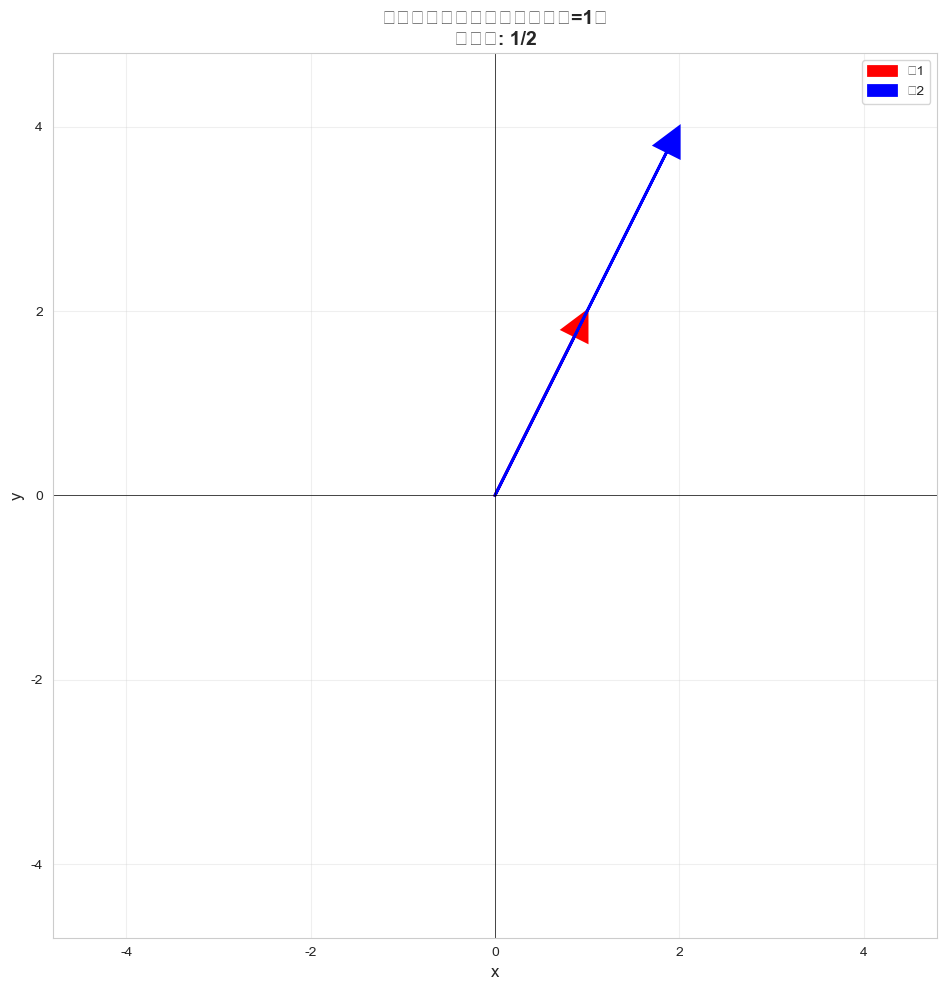

In [5]:
# 線形独立性の可視化
def visualize_rank_2d(matrix, title=""):
    """2次元ベクトルのランクを可視化"""
    if matrix.shape[0] != 2:
        print("この関数は2行の行列のみ対応しています")
        return

    rank = np.linalg.matrix_rank(matrix)

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # 原点から各列ベクトルを描画
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    for i in range(matrix.shape[1]):
        col = matrix[:, i]
        ax.arrow(0, 0, col[0], col[1], head_width=0.3, head_length=0.3,
                fc=colors[i % len(colors)], ec=colors[i % len(colors)],
                linewidth=2, length_includes_head=True, label=f'列{i+1}')

    # グリッドと軸
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)

    # 軸の範囲
    max_val = np.max(np.abs(matrix)) * 1.2
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)

    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title(f'{title}\nランク: {rank}/{matrix.shape[1]}', fontsize=14, fontweight='bold')
    ax.legend()
    ax.set_aspect('equal')

    plt.tight_layout()
    plt.show()

# 例: 線形独立な2つのベクトル
A_independent = np.array([[1, 2],
                          [3, 1]]).T  # 転置して列ベクトルにする
visualize_rank_2d(A_independent, "線形独立なベクトル（ランク=2）")

# 例: 線形従属なベクトル（1つは他方の倍数）
A_dependent = np.array([[1, 2],
                        [2, 4]]).T  # 2列目は1列目の2倍
visualize_rank_2d(A_dependent, "線形従属なベクトル（ランク=1）")


---

## 連立方程式との関係

連立方程式 $A\mathbf{x} = \mathbf{b}$ の解の存在は、ランクと密接に関係しています。

### 解の存在条件（Rouché-Capelliの定理）

連立方程式 $A\mathbf{x} = \mathbf{b}$ が解を持つための必要十分条件は：

$$\text{rank}(A) = \text{rank}([A|\mathbf{b}])$$

ここで、$[A|\mathbf{b}]$ は拡大係数行列（augmented matrix）です。

### 解の種類

1. **唯一解**: $\text{rank}(A) = \text{rank}([A|\mathbf{b}]) = n$ （$n$は変数の数）
2. **無限に多くの解**: $\text{rank}(A) = \text{rank}([A|\mathbf{b}]) < n$
3. **解なし**: $\text{rank}(A) < \text{rank}([A|\mathbf{b}])$


In [6]:
# 連立方程式の解の存在判定
def check_solution_existence(A, b):
    """連立方程式 Ax = b の解の存在を判定"""
    rank_A = np.linalg.matrix_rank(A)

    # 拡大係数行列 [A|b]
    Ab = np.column_stack([A, b])
    rank_Ab = np.linalg.matrix_rank(Ab)

    n = A.shape[1]  # 変数の数

    print(f"係数行列 A のランク: {rank_A}")
    print(f"拡大係数行列 [A|b] のランク: {rank_Ab}")
    print(f"変数の数: {n}")
    print()

    if rank_A == rank_Ab:
        if rank_A == n:
            print("✓ 唯一解が存在します")
            try:
                x = np.linalg.solve(A, b)
                print(f"解: x = {x.flatten()}")
            except np.linalg.LinAlgError:
                print("（数値的に解を求めることができませんでした）")
        else:
            print(f"✓ 無限に多くの解が存在します（自由変数: {n - rank_A}個）")
    else:
        print("✗ 解が存在しません（矛盾した方程式系）")

    return rank_A, rank_Ab

# 例1: 唯一解が存在する場合
print("=" * 50)
print("例1: 唯一解が存在する連立方程式")
print("=" * 50)
A1 = np.array([[1, 2],
               [3, 4]])
b1 = np.array([[5],
               [11]])
check_solution_existence(A1, b1)

print("\n" + "=" * 50)
print("例2: 無限に多くの解が存在する連立方程式")
print("=" * 50)
A2 = np.array([[1, 2, 3],
               [2, 4, 6]])  # 2行目は1行目の2倍
b2 = np.array([[6],
               [12]])  # bも比例関係
check_solution_existence(A2, b2)

print("\n" + "=" * 50)
print("例3: 解が存在しない連立方程式")
print("=" * 50)
A3 = np.array([[1, 2],
               [2, 4]])  # 2行目は1行目の2倍
b3 = np.array([[5],
               [11]])  # bは比例関係にない
check_solution_existence(A3, b3)


例1: 唯一解が存在する連立方程式
係数行列 A のランク: 2
拡大係数行列 [A|b] のランク: 2
変数の数: 2

✓ 唯一解が存在します
解: x = [1. 2.]

例2: 無限に多くの解が存在する連立方程式
係数行列 A のランク: 1
拡大係数行列 [A|b] のランク: 1
変数の数: 3

✓ 無限に多くの解が存在します（自由変数: 2個）

例3: 解が存在しない連立方程式
係数行列 A のランク: 1
拡大係数行列 [A|b] のランク: 2
変数の数: 2

✗ 解が存在しません（矛盾した方程式系）


(np.int64(1), np.int64(2))

---

## 逆行列との関係

正方行列 $A$ が逆行列を持つための必要十分条件は、$A$ が**フルランク**であることです。

### 重要な定理

$n \times n$ 正方行列 $A$ について、以下は同値です：

1. $A$ は逆行列 $A^{-1}$ を持つ（正則行列）
2. $\text{rank}(A) = n$ （フルランク）
3. $\det(A) \neq 0$
4. $A$ の列ベクトルは線形独立
5. $A\mathbf{x} = \mathbf{0}$ の解は $\mathbf{x} = \mathbf{0}$ のみ


In [7]:
# 逆行列の存在判定
def check_invertibility(A):
    """行列が逆行列を持つかどうかを判定"""
    if A.shape[0] != A.shape[1]:
        print("正方行列ではありません")
        return False

    n = A.shape[0]
    rank = np.linalg.matrix_rank(A)

    print(f"行列 A:\n{A}")
    print(f"\nサイズ: {A.shape}")
    print(f"ランク: {rank}")
    print(f"最大ランク: {n}")

    if rank == n:
        print("\n✓ フルランク → 逆行列が存在します")
        try:
            A_inv = np.linalg.inv(A)
            print(f"\n逆行列 A^(-1):\n{A_inv}")
            # 検証: A * A^(-1) = I
            I = np.dot(A, A_inv)
            print(f"\n検証: A * A^(-1) =\n{I}")
            return True
        except np.linalg.LinAlgError:
            print("\n✗ 逆行列の計算に失敗しました")
            return False
    else:
        print(f"\n✗ ランク不足（ランク={rank} < {n}） → 逆行列は存在しません")
        return False

# 例1: 逆行列が存在する場合
print("=" * 50)
print("例1: 逆行列が存在する行列")
print("=" * 50)
A1 = np.array([[1, 2],
               [3, 4]])
check_invertibility(A1)

print("\n" + "=" * 50)
print("例2: 逆行列が存在しない行列（ランク不足）")
print("=" * 50)
A2 = np.array([[1, 2],
               [2, 4]])  # 2行目は1行目の2倍
check_invertibility(A2)


例1: 逆行列が存在する行列
行列 A:
[[1 2]
 [3 4]]

サイズ: (2, 2)
ランク: 2
最大ランク: 2

✓ フルランク → 逆行列が存在します

逆行列 A^(-1):
[[-2.   1. ]
 [ 1.5 -0.5]]

検証: A * A^(-1) =
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]

例2: 逆行列が存在しない行列（ランク不足）
行列 A:
[[1 2]
 [2 4]]

サイズ: (2, 2)
ランク: 1
最大ランク: 2

✗ ランク不足（ランク=1 < 2） → 逆行列は存在しません


False

---

## ランクの可視化

ランクを理解するために、異なるランクの行列がどのようにデータを変換するかを可視化します。


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4273186490.py:57: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4273186490.py:57: UserWarning: Glyph 25563 (\N{CJK UNIFIED IDEOGRAPH-63DB}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4273186490.py:57: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4273186490.py:57: UserWarning: Glyph 21336 (\N{CJK UNIFIED IDEOGRAPH-5358}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4273186490.py:57: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/i

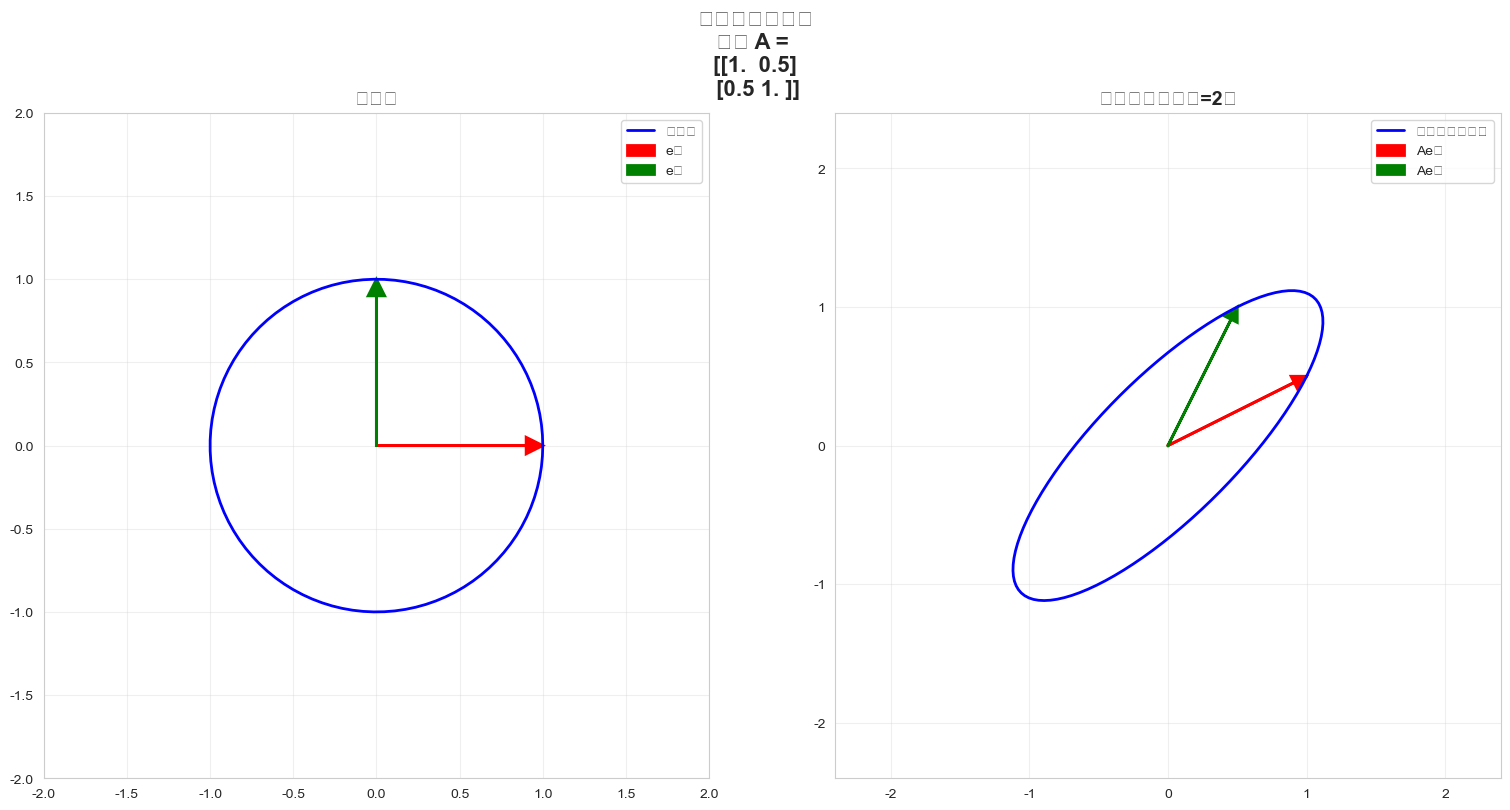

/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4273186490.py:57: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4273186490.py:57: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4273186490.py:57: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4273186490.py:57: UserWarning: Glyph 12388 (\N{HIRAGANA LETTER TU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4273186490.py:57: UserWarning: Glyph 28187 (\N{CJK UNIFIED IDEOGRAPH-6E1B}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4

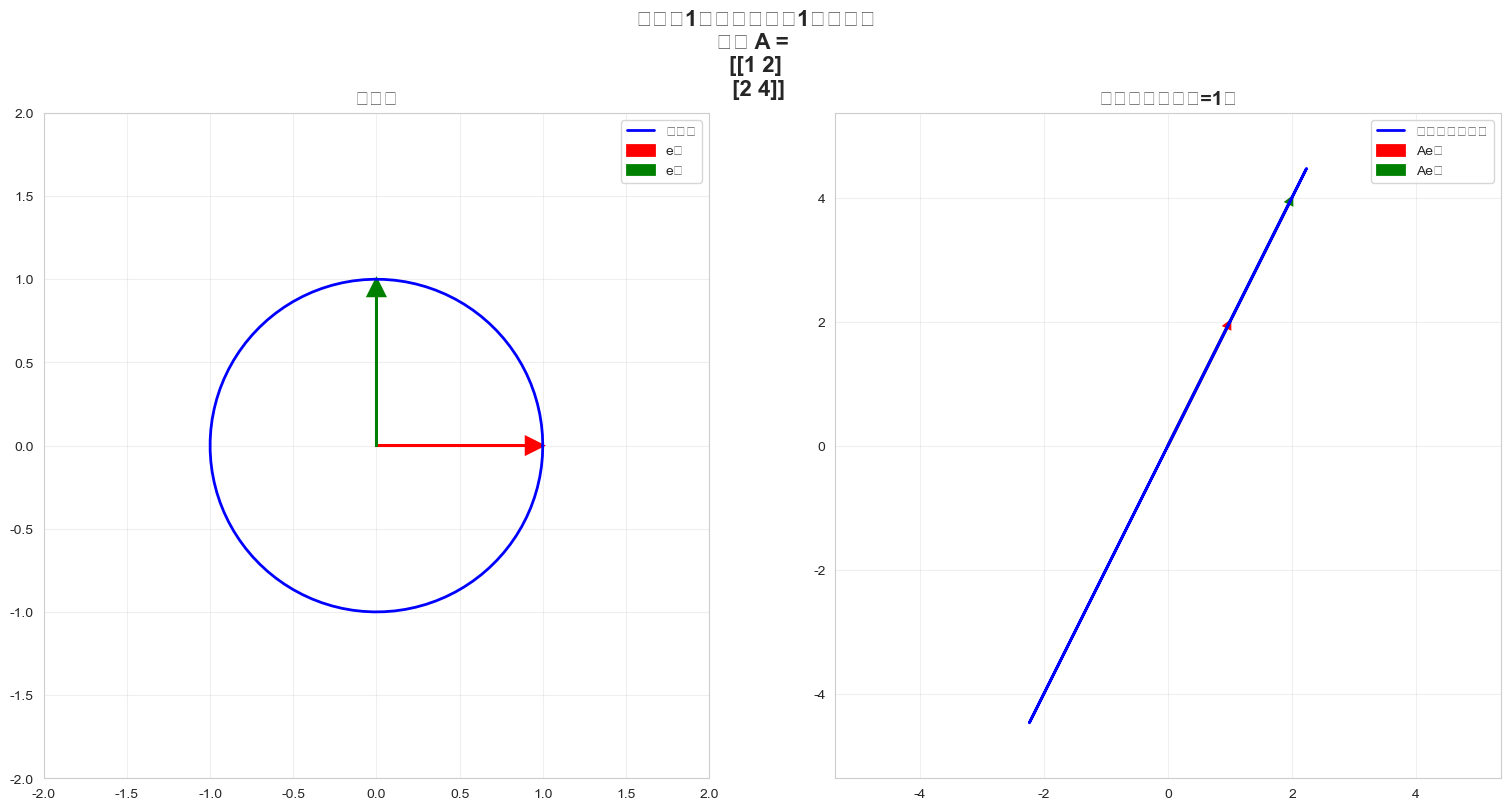

/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4273186490.py:57: UserWarning: Glyph 12377 (\N{HIRAGANA LETTER SU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4273186490.py:57: UserWarning: Glyph 12409 (\N{HIRAGANA LETTER BE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4273186490.py:57: UserWarning: Glyph 12390 (\N{HIRAGANA LETTER TE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4273186490.py:57: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4273186490.py:57: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/427318649

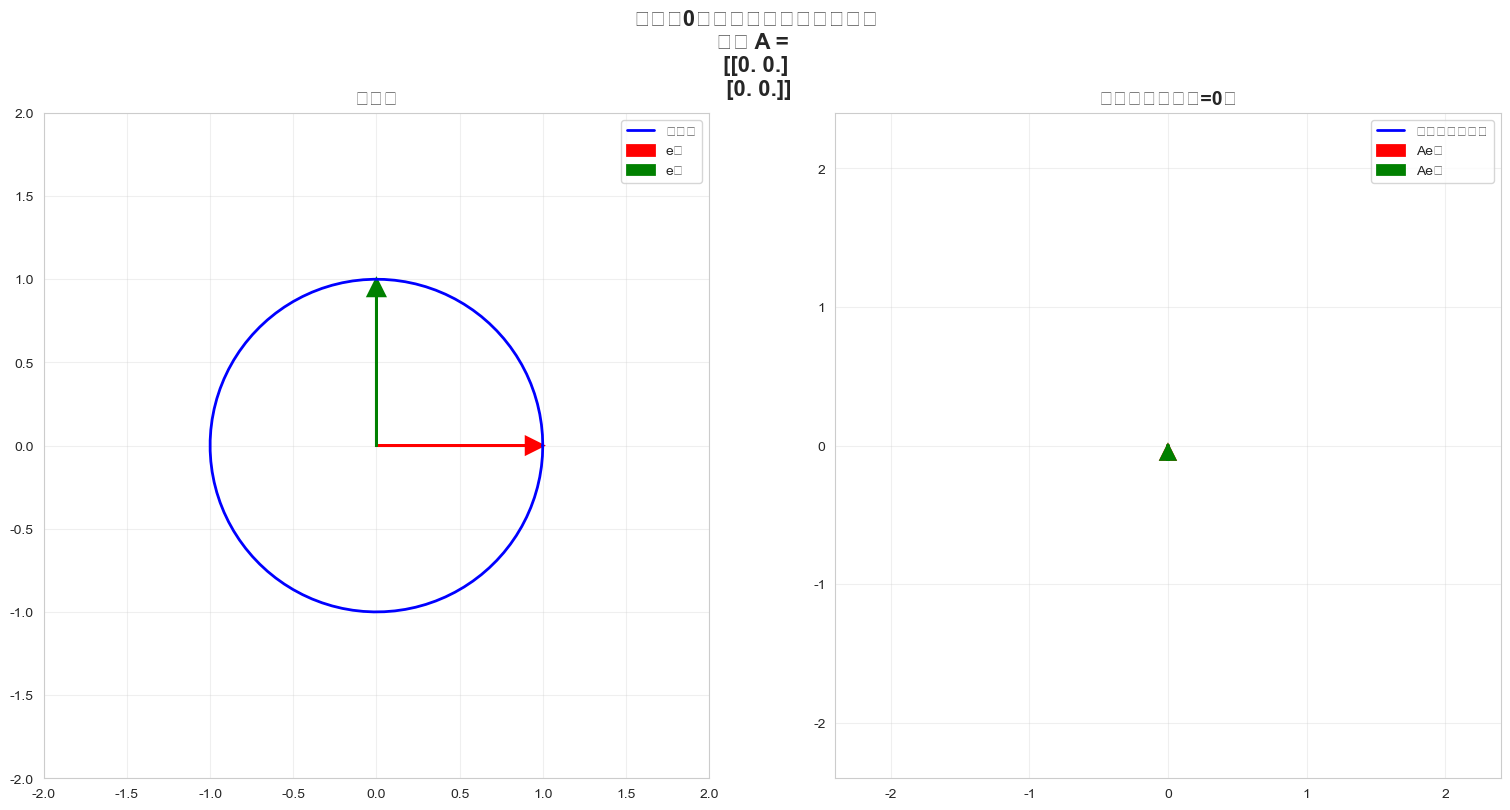

In [8]:
# ランクによる変換の違いを可視化
def visualize_rank_transformation(A, title=""):
    """行列による変換を可視化（2次元）"""
    if A.shape != (2, 2):
        print("この関数は2×2行列のみ対応しています")
        return

    rank = np.linalg.matrix_rank(A)

    # 単位円を生成
    theta = np.linspace(0, 2*np.pi, 100)
    circle = np.array([np.cos(theta), np.sin(theta)])

    # 変換後の円
    transformed_circle = A @ circle

    # 標準基底ベクトル
    e1 = np.array([[1], [0]])
    e2 = np.array([[0], [1]])

    # 変換後の基底ベクトル
    Ae1 = A @ e1
    Ae2 = A @ e2

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # 変換前
    ax1.plot(circle[0], circle[1], 'b-', linewidth=2, label='単位円')
    ax1.arrow(0, 0, e1[0, 0], e1[1, 0], head_width=0.1, head_length=0.1,
             fc='red', ec='red', linewidth=2, length_includes_head=True, label='e₁')
    ax1.arrow(0, 0, e2[0, 0], e2[1, 0], head_width=0.1, head_length=0.1,
             fc='green', ec='green', linewidth=2, length_includes_head=True, label='e₂')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(-2, 2)
    ax1.set_ylim(-2, 2)
    ax1.set_aspect('equal')
    ax1.set_title('変換前', fontsize=14, fontweight='bold')
    ax1.legend()

    # 変換後
    ax2.plot(transformed_circle[0], transformed_circle[1], 'b-', linewidth=2, label='変換後の単位円')
    ax2.arrow(0, 0, Ae1[0, 0], Ae1[1, 0], head_width=0.1, head_length=0.1,
             fc='red', ec='red', linewidth=2, length_includes_head=True, label='Ae₁')
    ax2.arrow(0, 0, Ae2[0, 0], Ae2[1, 0], head_width=0.1, head_length=0.1,
             fc='green', ec='green', linewidth=2, length_includes_head=True, label='Ae₂')
    ax2.grid(True, alpha=0.3)

    # 範囲を調整
    max_val = max(np.max(np.abs(transformed_circle)), 2) * 1.2
    ax2.set_xlim(-max_val, max_val)
    ax2.set_ylim(-max_val, max_val)
    ax2.set_aspect('equal')
    ax2.set_title(f'変換後（ランク={rank}）', fontsize=14, fontweight='bold')
    ax2.legend()

    plt.suptitle(f'{title}\n行列 A = \n{A}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# 例1: フルランク行列（ランク=2）
A_full = np.array([[1, 0.5],
                   [0.5, 1]])
visualize_rank_transformation(A_full, "フルランク行列")

# 例2: ランク1行列（1次元に潰れる）
A_rank1 = np.array([[1, 2],
                    [2, 4]])  # 2列目は1列目の2倍
visualize_rank_transformation(A_rank1, "ランク1行列（次元が1つ減る）")

# 例3: ランク0行列（零行列）
A_zero = np.zeros((2, 2))
visualize_rank_transformation(A_zero, "ランク0行列（すべてが原点に）")


---

## 実装例

ランクを使った実践的な例を見ていきます。


In [9]:
# 例1: データの実質的な次元を調べる
print("=" * 50)
print("例1: データ行列の実質的な次元")
print("=" * 50)

# 100個のサンプル、50個の特徴量を持つデータ
np.random.seed(42)
data = np.random.randn(100, 50)
rank_data = np.linalg.matrix_rank(data)

print(f"データ行列のサイズ: {data.shape}")
print(f"ランク: {rank_data}")
print(f"最大ランク: {min(data.shape)} = 50")
print(f"\n→ 実質的な次元数は {rank_data} です")
print(f"→ 理論的には最大50次元ですが、実際には {rank_data} 次元の情報があります")

# 線形従属な特徴量を追加
print("\n" + "=" * 50)
print("例2: 線形従属な特徴量を追加した場合")
print("=" * 50)

# 既存の特徴量の線形結合を追加
new_feature = 2 * data[:, 0] + 3 * data[:, 1]  # 0列目と1列目の線形結合
data_with_dependent = np.column_stack([data, new_feature])
rank_dependent = np.linalg.matrix_rank(data_with_dependent)

print(f"データ行列のサイズ: {data_with_dependent.shape}")
print(f"ランク: {rank_dependent}")
print(f"最大ランク: {min(data_with_dependent.shape)} = 50")
print(f"\n→ 51個の特徴量があっても、ランクは {rank_dependent} のまま")
print(f"→ 新しく追加した特徴量は既存の特徴量の線形結合なので、情報量は増えていません")


例1: データ行列の実質的な次元
データ行列のサイズ: (100, 50)
ランク: 50
最大ランク: 50 = 50

→ 実質的な次元数は 50 です
→ 理論的には最大50次元ですが、実際には 50 次元の情報があります

例2: 線形従属な特徴量を追加した場合
データ行列のサイズ: (100, 51)
ランク: 50
最大ランク: 51 = 50

→ 51個の特徴量があっても、ランクは 50 のまま
→ 新しく追加した特徴量は既存の特徴量の線形結合なので、情報量は増えていません


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4094211509.py:29: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4094211509.py:29: UserWarning: Glyph 30064 (\N{CJK UNIFIED IDEOGRAPH-7570}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4094211509.py:29: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4094211509.py:29: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/4094211509.py:29: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/40

例2: SVDによるランクの理解
行列 A のサイズ: (3, 3)
特異値: [8.51978293e+00 6.42883231e-01 2.75703694e-16]

NumPyのmatrix_rank: 2
SVDによるランク（閾値=1e-10）: 2

→ ランクは、ゼロでない特異値の数と一致します


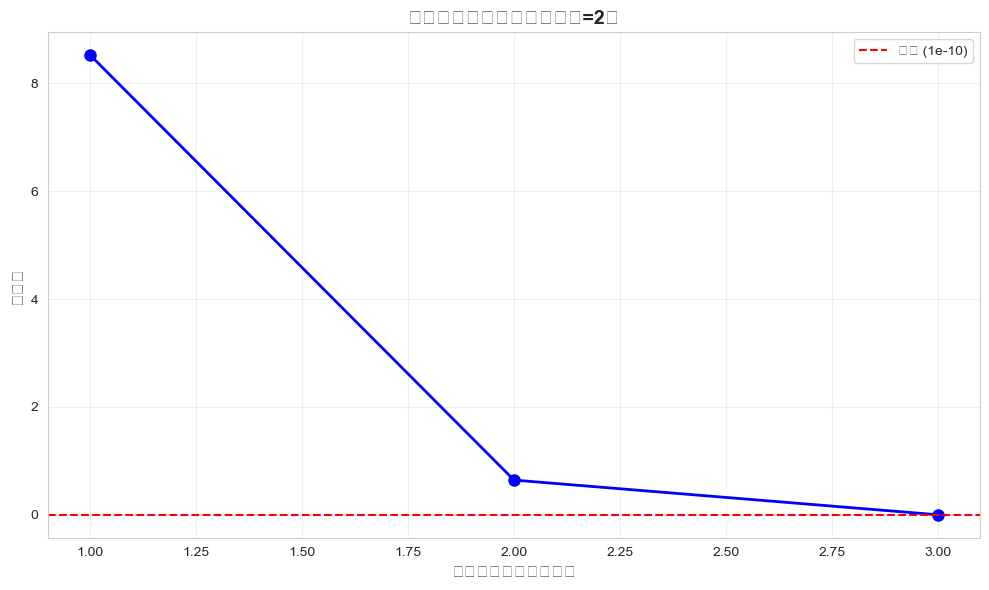

In [10]:
# 例2: 特異値分解（SVD）を使ったランクの理解
print("=" * 50)
print("例2: SVDによるランクの理解")
print("=" * 50)

def analyze_rank_with_svd(A, threshold=1e-10):
    """SVDを使ってランクを分析"""
    U, s, Vt = np.linalg.svd(A, full_matrices=False)

    # ゼロに近い特異値をカウント
    rank_by_svd = np.sum(s > threshold)
    rank_by_numpy = np.linalg.matrix_rank(A)

    print(f"行列 A のサイズ: {A.shape}")
    print(f"特異値: {s}")
    print(f"\nNumPyのmatrix_rank: {rank_by_numpy}")
    print(f"SVDによるランク（閾値={threshold}）: {rank_by_svd}")
    print(f"\n→ ランクは、ゼロでない特異値の数と一致します")

    # 特異値を可視化
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(s) + 1), s, 'bo-', linewidth=2, markersize=8)
    plt.axhline(y=threshold, color='r', linestyle='--', label=f'閾値 ({threshold})')
    plt.xlabel('特異値のインデックス', fontsize=12)
    plt.ylabel('特異値', fontsize=12)
    plt.title(f'特異値のプロット（ランク={rank_by_svd}）', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return U, s, Vt, rank_by_svd

# 例: ランク2の3×3行列
A = np.array([[1, 2, 3],
              [2, 4, 6],  # 1行目の2倍
              [1, 1, 1]])
U, s, Vt, rank = analyze_rank_with_svd(A)


例3: 低ランク近似によるデータ圧縮
元の行列のサイズ: (50, 50)
元のランク: 20


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/261924108.py:50: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/261924108.py:50: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/261924108.py:50: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/261924108.py:50: UserWarning: Glyph 36817 (\N{CJK UNIFIED IDEOGRAPH-8FD1}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/261924108.py:50: UserWarning: Glyph 20284 (\N{CJK UNIFIED IDEOGRAPH-4F3C}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/261924108.py:50

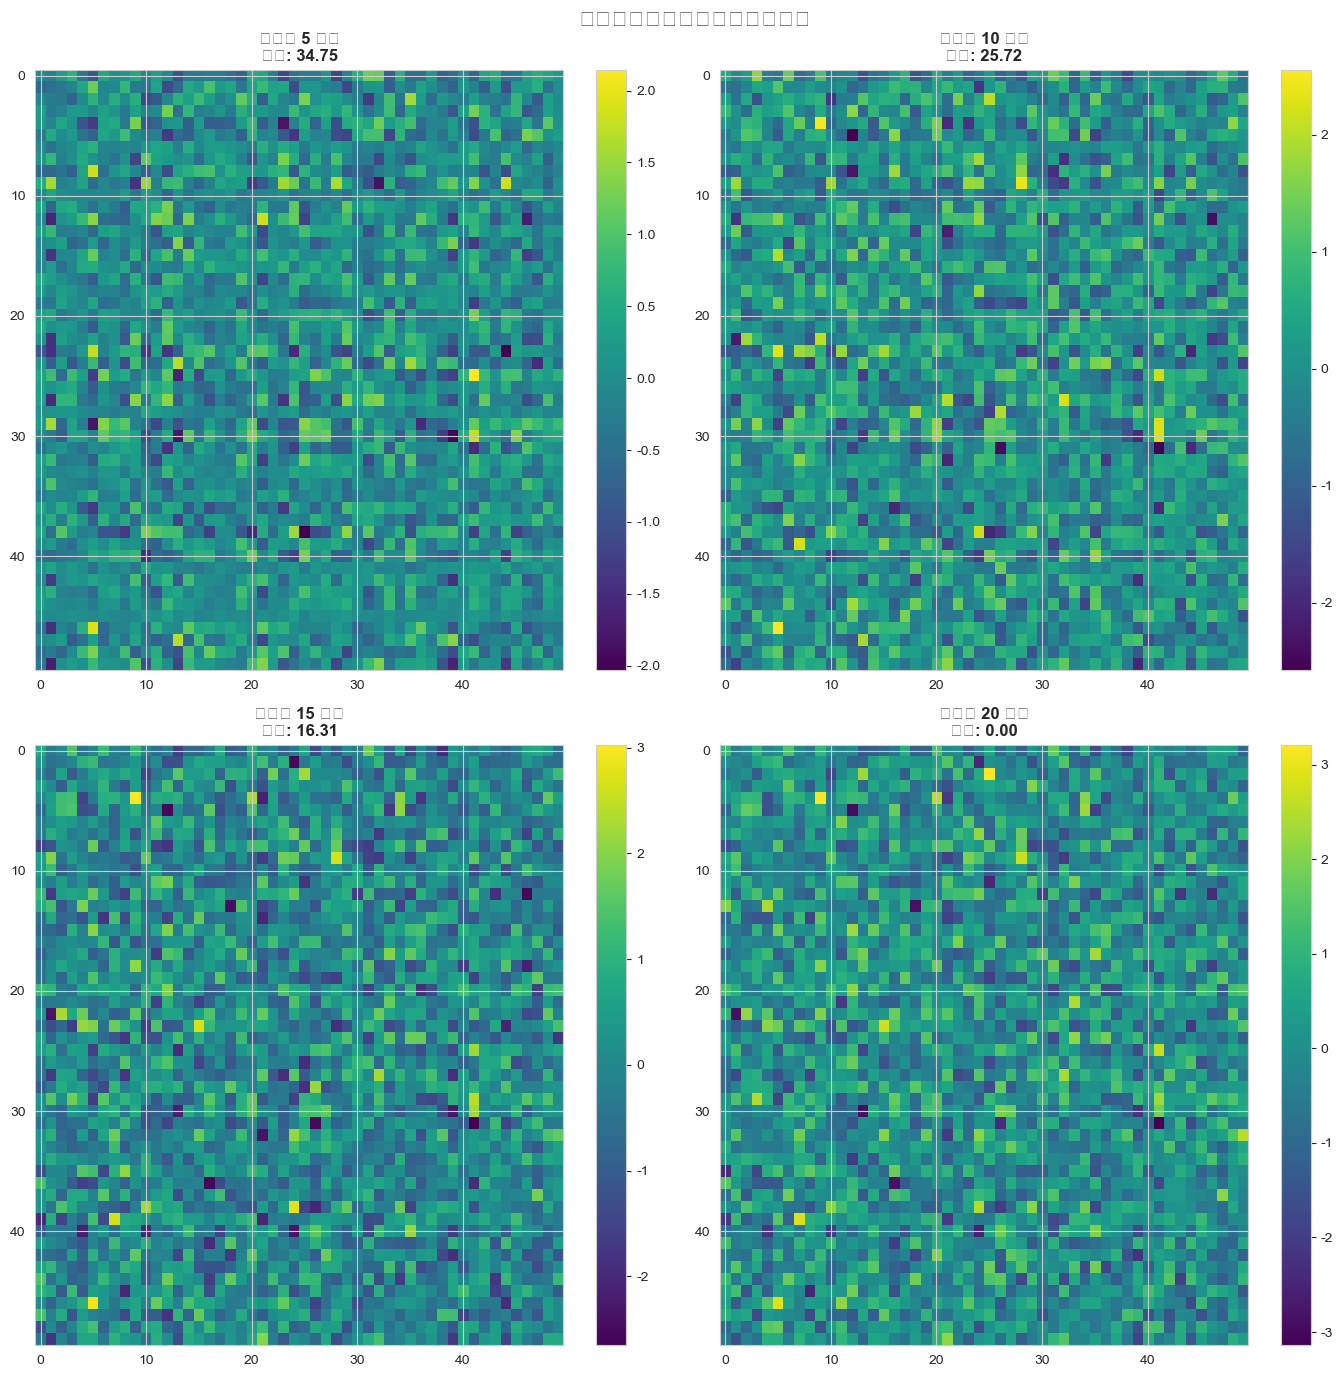


→ ランクが低いほど、データは圧縮されますが、誤差が大きくなります
→ ランクと誤差のバランスを取ることが重要です


In [11]:
# 例3: 低ランク近似
print("=" * 50)
print("例3: 低ランク近似によるデータ圧縮")
print("=" * 50)

def low_rank_approximation(A, rank_k):
    """ランクkでの低ランク近似"""
    U, s, Vt = np.linalg.svd(A, full_matrices=False)

    # 上位k個の特異値のみを使用
    U_k = U[:, :rank_k]
    s_k = s[:rank_k]
    Vt_k = Vt[:rank_k, :]

    # 近似行列を再構成
    A_approx = U_k @ np.diag(s_k) @ Vt_k

    # 誤差を計算
    error = np.linalg.norm(A - A_approx, 'fro')  # Frobeniusノルム

    return A_approx, error, U_k, s_k, Vt_k

# 例: 画像風のデータ（実際にはランダムデータ）
np.random.seed(42)
original_rank = 20
A_image = np.random.randn(50, 50)
# ランクを制限するためにSVDを使って再構成
U, s, Vt = np.linalg.svd(A_image, full_matrices=False)
s[original_rank:] = 0  # 20個以降の特異値を0に
A_image = U @ np.diag(s) @ Vt

full_rank = np.linalg.matrix_rank(A_image)
print(f"元の行列のサイズ: {A_image.shape}")
print(f"元のランク: {full_rank}")

# 異なるランクでの近似
ranks_to_try = [5, 10, 15, full_rank]

fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

for i, rank_k in enumerate(ranks_to_try):
    A_approx, error, _, _, _ = low_rank_approximation(A_image, rank_k)

    im = axes[i].imshow(A_approx, cmap='viridis', aspect='auto')
    axes[i].set_title(f'ランク {rank_k} 近似\n誤差: {error:.2f}', fontsize=12, fontweight='bold')
    plt.colorbar(im, ax=axes[i])

plt.suptitle('低ランク近似によるデータ圧縮', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n→ ランクが低いほど、データは圧縮されますが、誤差が大きくなります")
print("→ ランクと誤差のバランスを取ることが重要です")


---

## 機械学習での応用例

ランクは機械学習の様々な場面で重要な役割を果たします。


In [12]:
# 応用例1: 特徴量選択と多重共線性の検出
print("=" * 50)
print("応用例1: 多重共線性の検出")
print("=" * 50)

# シミュレーションデータ: いくつかの特徴量が線形従属
np.random.seed(42)
n_samples = 100
n_features = 5

# 独立な特徴量
X_independent = np.random.randn(n_samples, 3)

# 線形従属な特徴量を追加（既存の特徴量の線形結合）
X_dependent1 = 2 * X_independent[:, 0] + 3 * X_independent[:, 1]
X_dependent2 = X_independent[:, 1] - X_independent[:, 2]

# 完全なデータ行列
X_full = np.column_stack([X_independent, X_dependent1, X_dependent2])

rank_X = np.linalg.matrix_rank(X_full)

print(f"データ行列のサイズ: {X_full.shape}")
print(f"ランク: {rank_X}")
print(f"最大ランク: {min(X_full.shape)} = {n_samples}")
print(f"\n→ 5個の特徴量があるが、ランクは {rank_X}")
print(f"→ これは、{X_full.shape[1] - rank_X} 個の特徴量が他の特徴量の線形結合であることを示しています")
print(f"\n注意: 多重共線性があると、線形回帰などのモデルで問題が発生する可能性があります")


応用例1: 多重共線性の検出
データ行列のサイズ: (100, 5)
ランク: 3
最大ランク: 5 = 100

→ 5個の特徴量があるが、ランクは 3
→ これは、2 個の特徴量が他の特徴量の線形結合であることを示しています

注意: 多重共線性があると、線形回帰などのモデルで問題が発生する可能性があります


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/2430117309.py:68: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/2430117309.py:68: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/2430117309.py:68: UserWarning: Glyph 30058 (\N{CJK UNIFIED IDEOGRAPH-756A}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/2430117309.py:68: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_88183/2430117309.py:68: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/i

応用例2: PCAにおけるランクの重要性
データ行列のサイズ: (200, 10)
データ行列のランク: 10
共分散行列のランク: 10
真のランク: 3

上位 3 成分の寄与率: [0.47744084 0.31931828 0.20109696]
累積寄与率: 0.9979


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30058 (\N{CJK UNIFIED IDEOGRAPH-756A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) Arial.
  fig.canvas.print_fig

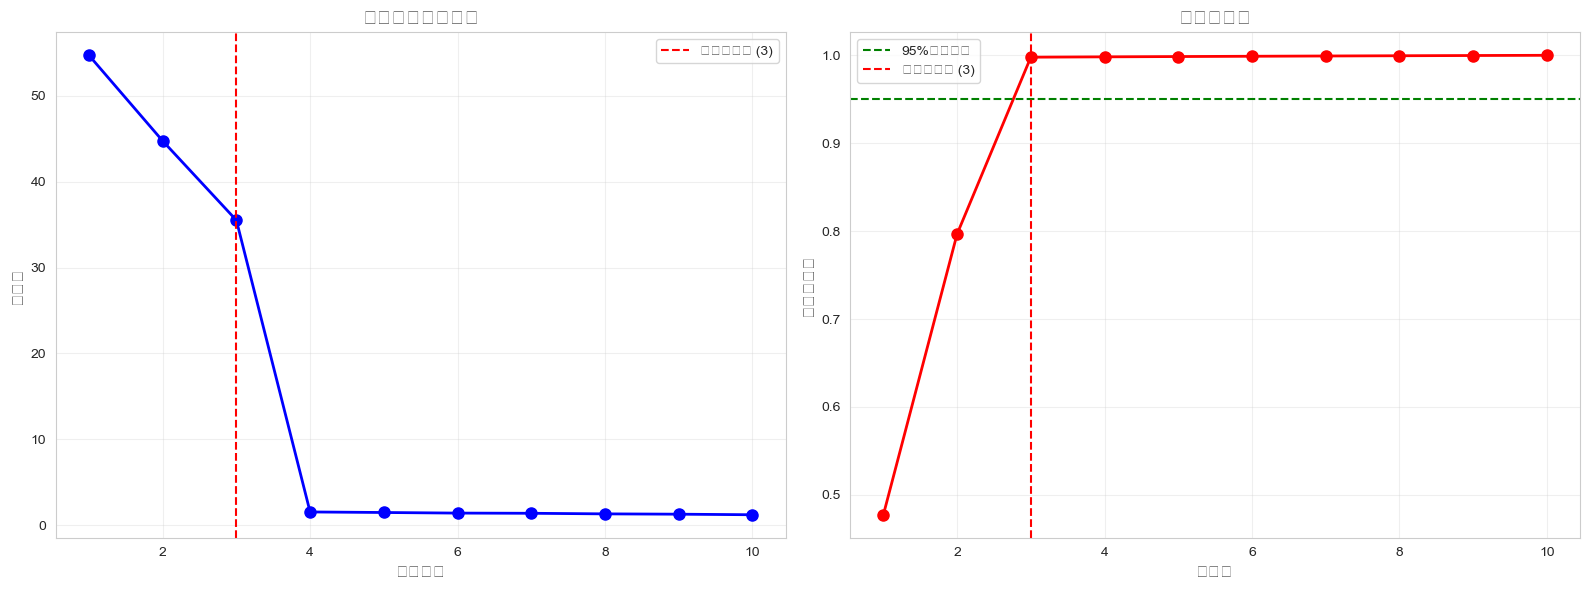


→ ランク 3 の成分で、データの大部分を説明できます
→ これがPCAで次元削減を行う根拠となります


In [13]:
# 応用例2: 主成分分析（PCA）との関係
print("=" * 50)
print("応用例2: PCAにおけるランクの重要性")
print("=" * 50)

# データを生成（実際には低ランクの構造を持つ）
np.random.seed(42)
n_samples = 200
n_features = 10

# 真のランク（実質的な次元数）
true_rank = 3

# 低ランクのデータを生成
U = np.random.randn(n_samples, true_rank)
V = np.random.randn(true_rank, n_features)
X_low_rank = U @ V

# ノイズを追加
noise = 0.1 * np.random.randn(n_samples, n_features)
X = X_low_rank + noise

# データのランクを計算
rank_X = np.linalg.matrix_rank(X)

# 共分散行列
X_centered = X - X.mean(axis=0)
cov_matrix = (X_centered.T @ X_centered) / (n_samples - 1)
rank_cov = np.linalg.matrix_rank(cov_matrix)

print(f"データ行列のサイズ: {X.shape}")
print(f"データ行列のランク: {rank_X}")
print(f"共分散行列のランク: {rank_cov}")
print(f"真のランク: {true_rank}")

# PCAを実行（特異値分解を使用）
U_svd, s_svd, Vt_svd = np.linalg.svd(X_centered, full_matrices=False)

# 寄与率を計算
explained_variance_ratio = s_svd**2 / np.sum(s_svd**2)
cumulative_ratio = np.cumsum(explained_variance_ratio)

print(f"\n上位 {true_rank} 成分の寄与率: {explained_variance_ratio[:true_rank]}")
print(f"累積寄与率: {cumulative_ratio[true_rank-1]:.4f}")

# 可視化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 特異値のプロット
ax1.plot(range(1, len(s_svd) + 1), s_svd, 'bo-', linewidth=2, markersize=8)
ax1.axvline(x=true_rank, color='r', linestyle='--', label=f'真のランク ({true_rank})')
ax1.set_xlabel('成分番号', fontsize=12)
ax1.set_ylabel('特異値', fontsize=12)
ax1.set_title('特異値のプロット', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# 累積寄与率のプロット
ax2.plot(range(1, len(cumulative_ratio) + 1), cumulative_ratio, 'ro-', linewidth=2, markersize=8)
ax2.axhline(y=0.95, color='g', linestyle='--', label='95%の寄与率')
ax2.axvline(x=true_rank, color='r', linestyle='--', label=f'真のランク ({true_rank})')
ax2.set_xlabel('成分数', fontsize=12)
ax2.set_ylabel('累積寄与率', fontsize=12)
ax2.set_title('累積寄与率', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print(f"\n→ ランク {true_rank} の成分で、データの大部分を説明できます")
print(f"→ これがPCAで次元削減を行う根拠となります")


---

## まとめ

このノートブックでは、**ランク（rank）**について学びました：

### 重要なポイント

1. **ランクの定義**: 行列の線形独立な行（または列）の最大数
2. **情報量の指標**: データの中に実質的にどれだけの情報量があるかを示す
3. **連立方程式との関係**: ランクを使って解の存在を判定できる
4. **逆行列との関係**: 正方行列が逆行列を持つための必要十分条件はフルランク
5. **機械学習での応用**: 多重共線性の検出、PCA、次元削減など

### 実践的な活用

- **データの前処理**: ランクを確認して、不要な特徴量を削除
- **モデルの診断**: ランク不足は過学習や数値的不安定性の原因になる
- **次元削減**: 低ランク近似を使ってデータを圧縮

ランクを理解することで、データの本質的な構造を把握し、より効果的な機械学習モデルを構築できるようになります。
